# PCA Task
### Let us start the PCA task on the BATAdal dataset.
#### Step 0: Reading the both the data sets (BATADAL_dataset03, 04) using read_csv and explore the column names and data
#### Step 1: Normalize the training dataset
#### Step 2: Apply PCA analysis on training data
#### Step 3: Tune the threshold  
#### Step 4: Apply the same normalization and PCA transform on the test data



#### Step 0: Reading the both the data sets (BATADAL_dataset03, 04) using read_csv and explore the column names and data

In [57]:
#Step 0: Reading the both the data sets (BATADAL_dataset03, 04) using read_csv and explore the column names and data
#importing pandas for reading the csv file
import pandas as pd
import matplotlib.pyplot as plt

dataset03 = pd.read_csv("BATADAL_dataset03.csv")
dataset04 = pd.read_csv("BATADAL_dataset04.csv")

# Observing the dataset columns and values
print ("BATADAL_dataset03.csv")
print(dataset03.head())
print (dataset03.columns)
print ("BATADAL_dataset04.csv")
print(dataset04.head())
print (dataset04.columns)

BATADAL_dataset03.csv
      DATETIME      L_T1      L_T2      L_T3      L_T4      L_T5      L_T6  \
0  06/01/14 00  0.509730  2.049003  3.191145  2.792634  2.656091  5.316831   
1  06/01/14 01  0.412580  2.009072  3.642565  2.831673  3.126387  5.494855   
2  06/01/14 02  0.320112  1.986093  4.140192  3.256733  3.574601  5.500000   
3  06/01/14 03  0.332879  2.009203  4.673478  3.744497  3.952379  5.500000   
4  06/01/14 04  0.483496  2.089049  5.237937  4.409456  3.504676  5.500000   

       L_T7      F_PU1  S_PU1    ...        P_J256     P_J289     P_J415  \
0  1.562321  98.998444      1    ...     87.605774  26.495605  84.206619   
1  1.852043  99.095901      1    ...     89.448341  26.487326  85.900085   
2  2.246126  98.420959      1    ...     91.056114  26.487364  86.582474   
3  3.203573  97.575172      1    ...     92.594353  26.575815  88.020546   
4  4.439714  97.351059      1    ...     94.473099  26.723457  90.422462   

      P_J302     P_J306     P_J307     P_J317      P

## Pre-Processing - Dataset03
#### Dropping ATT_FLAG and DATETIME columns in dataset03 as they are not important for the PCA

In [58]:
dataset03= dataset03.drop("ATT_FLAG",axis=1,inplace=False) 
dataset03.head()
dataset03 = dataset03.loc[:,dataset03.columns!='DATETIME'] 
dataset03.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,26.426495,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471
1,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,26.422962,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256
2,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,26.427771,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538
3,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,26.519985,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952
4,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,26.671642,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263


#### Training data is taken from BATADAL_dataset03 at first and PCA will be applied on this.

#### Step 1: Normalize the training dataset

##### Let us first create the normalized training data by applying StandardScaler

In [59]:
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing
import numpy as np
X_scaled = preprocessing.scale(dataset03)
print("X_scaled")
print(X_scaled)
#Scaled data has zero mean and unit variance:
print("Mean")
print(X_scaled.mean(axis=0))
print("Standard Deviation")
print(X_scaled.std(axis=0))


X_scaled
[[-1.80166786 -0.84216105 -1.4897346  ... -0.14960353 -1.03212449
  -0.36335486]
 [-1.88243244 -0.8693521  -0.82434137 ... -0.13962538 -1.03997205
  -0.37585097]
 [-1.95930569 -0.88499958 -0.09084088 ...  0.84640594 -1.03990535
  -0.37574476]
 ...
 [ 0.36394528  0.45105891 -1.58995051 ... -0.2674142  -0.58470987
   0.34908874]
 [ 0.21173951  0.41325741 -0.97116869 ... -0.20251108 -0.60133195
   0.32262046]
 [ 0.05827056  0.36958123 -0.32060645 ...  0.12189842 -0.60166048
   0.32209734]]
Mean
[-2.41686720e-16 -1.00162114e-16 -2.07268666e-16 -1.89780847e-16
 -1.33110177e-16  3.10462001e-15 -2.83860241e-17  3.77128606e-16
  0.00000000e+00 -2.75141677e-16  4.11597350e-17  0.00000000e+00
  0.00000000e+00 -7.02554098e-17 -1.63726532e-17  0.00000000e+00
  0.00000000e+00 -3.04135973e-17 -3.40632290e-17  1.13138582e-16
 -8.47525578e-17 -7.13198857e-17 -6.58454381e-17  0.00000000e+00
  0.00000000e+00 -3.11435236e-16 -3.71045887e-17 -4.46066094e-18
  1.41930121e-17  8.39415285e-17 -5.636

#### Step 2: Apply PCA analysis on training data - dataset03



In [60]:
#n_components= None
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
fit = pca.fit(X_scaled)
transform = pca.transform(X_scaled)


print(pca.fit(X_scaled))
print(pca.transform(X_scaled))
print("--------------explained_variance_ratio_--------------")
print(pca.explained_variance_ratio_) 
print("-----------------singular_values_--------------------")
print(pca.singular_values_)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[[-2.24905257e+00 -2.51721473e+00 -1.61306891e+00 ...  2.05419995e-16
  -9.72985497e-18  6.37931060e-17]
 [-2.31116088e+00 -2.56834897e+00 -1.59614586e+00 ...  1.01396959e-16
  -9.82125573e-18  5.81660687e-17]
 [-2.15564395e+00 -2.55573008e+00 -1.52915128e+00 ... -6.69460056e-17
  -1.08497382e-17  4.24920204e-17]
 ...
 [-1.08896885e+00 -2.33739456e+00 -1.24527305e+00 ...  2.36285287e-16
  -3.12681551e-18 -1.75310255e-17]
 [-1.14882797e+00 -2.36946046e+00 -1.26217592e+00 ...  2.56036559e-17
   8.75134667e-19 -2.31467129e-18]
 [-1.22150861e+00 -2.51090192e+00 -1.16303742e+00 ... -8.90120759e-17
   3.98820989e-18  1.71767442e-17]]
--------------explained_variance_ratio_--------------
[2.14942175e-01 1.33800981e-01 1.28034135e-01 9.97660991e-02
 7.21351518e-02 6.76029376e-02 5.55306781e-02 5.53794557e-02
 4.25269870e-02 3.24840113e-02 2.56616888e-02 2.45804466e-02
 1.8638

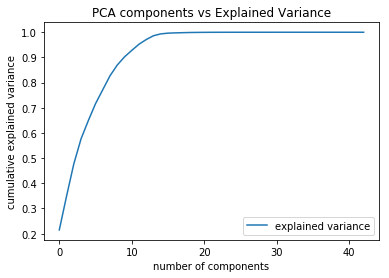

In [61]:
#pca = PCA().fit(dta.iloc[:,2:42]) #modify this 
plt.plot(np.cumsum(pca.explained_variance_ratio_),label ='explained variance')
plt.title('PCA components vs Explained Variance')
plt.legend()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

let us try the PCA for n_components for 10,11,12,13,14,15 as we see visually, the n_components post 15 produces stable variance

X_scaled
[[-1.80166786 -0.84216105 -1.4897346  ... -0.14960353 -1.03212449
  -0.36335486]
 [-1.88243244 -0.8693521  -0.82434137 ... -0.13962538 -1.03997205
  -0.37585097]
 [-1.95930569 -0.88499958 -0.09084088 ...  0.84640594 -1.03990535
  -0.37574476]
 ...
 [ 0.36394528  0.45105891 -1.58995051 ... -0.2674142  -0.58470987
   0.34908874]
 [ 0.21173951  0.41325741 -0.97116869 ... -0.20251108 -0.60133195
   0.32262046]
 [ 0.05827056  0.36958123 -0.32060645 ...  0.12189842 -0.60166048
   0.32209734]]
Mean
[-2.41686720e-16 -1.00162114e-16 -2.07268666e-16 -1.89780847e-16
 -1.33110177e-16  3.10462001e-15 -2.83860241e-17  3.77128606e-16
  0.00000000e+00 -2.75141677e-16  4.11597350e-17  0.00000000e+00
  0.00000000e+00 -7.02554098e-17 -1.63726532e-17  0.00000000e+00
  0.00000000e+00 -3.04135973e-17 -3.40632290e-17  1.13138582e-16
 -8.47525578e-17 -7.13198857e-17 -6.58454381e-17  0.00000000e+00
  0.00000000e+00 -3.11435236e-16 -3.71045887e-17 -4.46066094e-18
  1.41930121e-17  8.39415285e-17 -5.636

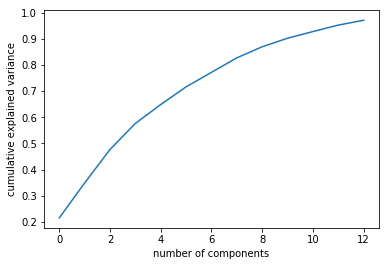

In [62]:
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing
import numpy as np
X_scaled = preprocessing.scale(dataset03)
print("X_scaled")
print(X_scaled)
#Scaled data has zero mean and unit variance:
print("Mean")
print(X_scaled.mean(axis=0))
print("Standard Deviation")

print(X_scaled.std(axis=0))
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
fit = pca.fit(X_scaled)
transform = pca.transform(X_scaled)


print(pca.fit(X_scaled))
print(pca.transform(X_scaled))
print("--------------explained_variance_ratio_--------------")
print(pca.explained_variance_ratio_) 
print("-----------------singular_values_--------------------")
print(pca.singular_values_)

#pca = PCA().fit(dta.iloc[:,2:42]) #modify this 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Hence n_components = 13 is a good value after which there is no variance

In [63]:
#pREPROCESSING FOR DATASET04
import pandas as pd
dataset04 = pd.read_csv("BATADAL_dataset04.csv")
dataset04_compare = dataset04
dataset04 = dataset04.drop(" ATT_FLAG",axis=1,inplace=False) 
dataset04.head()
dataset04 = dataset04.loc[:,dataset04.columns!='DATETIME'] 
dataset04.head()


,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,2.44,5.24,3.19,4.10,2.86,5.50,4.39,93.63,1.0,93.65,...,28.26,70.00,28.22,85.87,21.69,82.72,21.58,71.99,39.33,29.64
1,2.66,4.53,3.20,4.18,3.29,5.44,4.53,89.41,1.0,89.43,...,24.39,87.73,24.45,84.87,29.81,86.62,29.81,59.76,42.17,26.15
2,3.11,3.66,3.66,4.21,3.87,5.15,3.22,89.88,1.0,89.89,...,23.84,89.29,23.90,87.11,29.85,87.64,29.85,58.50,42.00,25.56
3,3.62,3.04,4.17,4.04,3.56,4.98,2.40,88.10,1.0,88.12,...,27.00,91.98,27.10,68.75,31.60,64.25,31.47,72.30,43.24,28.38
4,4.08,2.68,4.73,3.20,3.11,5.39,3.46,87.01,1.0,87.03,...,26.67,92.11,26.76,68.74,32.30,64.23,32.17,72.53,44.00,28.04


In [64]:
#Normalzation
from sklearn import preprocessing
import numpy as np
X_scaled04 = preprocessing.scale(dataset04)

In [65]:
#PCA
import numpy as np
from sklearn.decomposition import PCA
#pca = PCA(n_components=10)
transform04 = pca.transform(X_scaled04)

#print(pca.fit(X_scaled))

print(pca.transform(X_scaled04))
print("--------------explained_variance_ratio_--------------")
print(pca.explained_variance_ratio_) 
print("-----------------singular_values_--------------------")
print(pca.singular_values_)

[[-0.28924535 -2.18901929  0.11901902 ... -1.51983968 -0.15776721
  -0.14650956]
 [-0.61345308 -1.79288428  3.82974256 ... -1.47672632 -0.93515988
  -0.16901641]
 [-0.81710005 -1.52034133  4.20208199 ... -2.01481296 -0.5710549
   0.04693685]
 ...
 [-2.50746549  3.05920566 -0.21378261 ...  1.31780065  0.46909519
  -0.08641066]
 [-3.10462061  2.67007693 -0.29710146 ...  1.96924306 -0.60273188
  -0.84618155]
 [-4.75764835  1.35779165 -2.4911471  ...  0.93488346 -1.33196017
  -1.28091922]]
--------------explained_variance_ratio_--------------
[0.21494218 0.13380098 0.12803414 0.0997661  0.07213515 0.06760294
 0.05553068 0.05537946 0.04252699 0.03248401 0.02566169 0.02458045
 0.01863863]
-----------------singular_values_--------------------
[260.36878125 205.42710216 200.95137245 177.3861003  150.83480477
 146.01950594 132.34105095 132.16073091 115.81382302 101.21920392
  89.96440413  88.04870556  76.67169319]


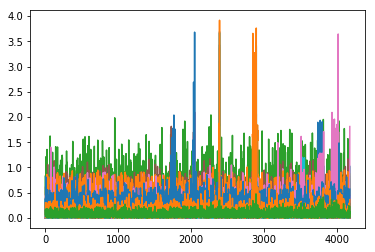

In [66]:
#tranform back to original space of dataset 04 -- this is done to compute the residuals
transform_back = np.dot(transform04,pca.components_)

#residuals stored into an array - residuals are the difference between X_scaled04 and transform_back

residuals = X_scaled04 - transform_back

import matplotlib.pyplot as plt
plt.plot(abs(residuals))
plt.show()


We can visually see that the threshold at 2, 

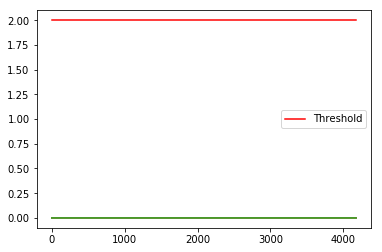

In [56]:
#set the threshold

threshold = 2.0
plt.plot(abs(residuals))
plt.plot([0,len(abs(residuals))],[threshold,threshold],'r',label="Threshold")
plt.legend()
plt.show()

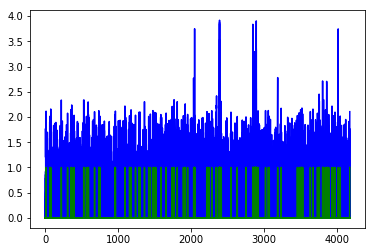

In [28]:
#dataset04_compare
dataset04_compare = dataset04_compare.loc[:,dataset04_compare.columns!='DATETIME'] 
dataset04_compare2 = list(dataset04_compare.loc[dataset04_compare[' ATT_FLAG'] == 1].index)
#print(dataset04_compare2)
scale = preprocessing.scale(dataset04_compare2)
threshold = 2.0
plt.plot(abs(residuals),'b')

#plt.plot(abs(scale),'y')
#plt.plot([0,len(abs(dataset04))],[threshold,threshold],'r')


plt.plot(abs(residuals)>threshold,'g')# plot the predicted label
#plt.plot(1*y_test.values,'r')# plot the true label
plt.show()

In [12]:
# function of deciding the number of eigenvalue to use for PCA
def percentage2n(eigVals,percentage):  
    sortArray=np.sort(eigVals)   
    sortArray=sortArray[-1::-1]   
    arraySum=sum(sortArray)  
    tmpSum=0  
    num=0  
    for i in sortArray:  
        tmpSum+=i  
        num+=1  
        if tmpSum>=arraySum*percentage:  
            return num,sortArray

In [13]:
# find the number of eigenvalue
covMat=np.cov(transform,rowvar=0)
eigVals,eigVects=np.linalg.eig(np.mat(covMat)) 
num,sortArray = percentage2n(eigVals,0.99)
print ('Number of principle component:',num )   # 6 principle component
#print 'array of eigenvalue:',sortArray        # variance

Number of principle component: 10


# define the function of PCA. return the reconstructed data and principle eigenvectors.
def pca(newData,n):   
    covMat=np.cov(newData,rowvar=0)    #calculate covariance matrix  
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))  
    eigValIndice=np.argsort(eigVals)             
    n_eigValIndice=eigValIndice[-1:-(n+1):-1]    
    n_eigVect=eigVects[:,n_eigValIndice]         
    lowDDataMat=newData*n_eigVect                
    reconMat=(lowDDataMat*n_eigVect.T)  #reconstructed data 
    return n_eigVect,reconMat

P,X_train_rec = pca(transform,num)

In [14]:
#Compute and plot the residual
import matplotlib.pyplot as plt
residual_pca1 = transform - X_train_rec
residual_pca2 = np.square(residual_pca1)
residual_pca = residual_pca2.sum(axis=1) 

figure, ax = plt.subplots(figsize=[25,15])
plt.figure(figsize=[25,10])
ax.plot(residual_pca)

NameError: name 'X_train_rec' is not defined